In [1]:
from torch_geometric.data import Data

In [25]:
import torch

num_nodes = 6
edge_index = torch.tensor([[0, 0, 1, 2, 2, 3, 4, 5], [1, 2, 2, 3, 4, 5, 5, 5]])
x = torch.tensor([
    [0., 10.],
    [1., 11.],
    [2., 12.],
    [3., 13.],
    [4., 14.],
    [5., 15.],
])
data = Data(x=x, edge_index=edge_index)
display(data)

Data(x=[6, 2], edge_index=[2, 8])

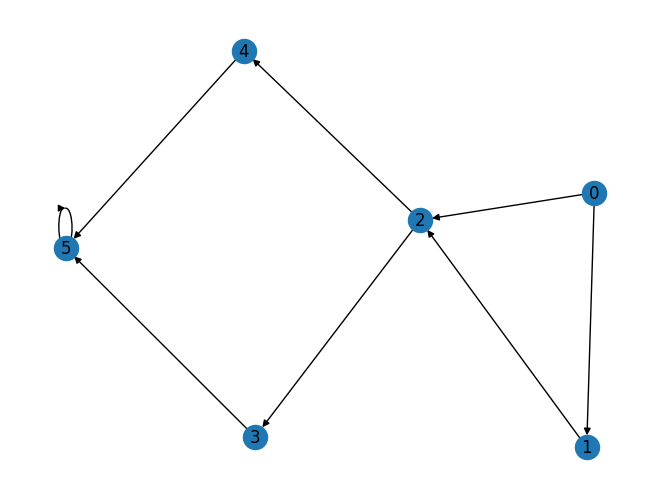

In [26]:
from matplotlib import pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(edge_index.numpy().T)
nx.draw(G, with_labels=True)
plt.show()

In [32]:
from torch_geometric.utils import add_self_loops

add_self_loops(edge_index, num_nodes=x.size(0))

(tensor([[0, 0, 1, 2, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5],
         [1, 2, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5]]),
 None)

In [52]:
from torch_geometric.nn import MessagePassing
class SimpleGNN(MessagePassing):
    def __init__(self):
        super().__init__(aggr='add')
                
    def forward(self, x, edge_index):
        # messageを呼ぶ
        norm = torch.tensor([0, 100, 200, 300, 400, 500, 600, 700])
        out = self.propagate(edge_index, x=x, norm=norm)
        return out
    
    def message(self, x_j, norm):
        # x_j += 1
        return norm.view(-1, 1) + x_j

In [53]:
x

tensor([[ 0., 10.],
        [ 1., 11.],
        [ 2., 12.],
        [ 3., 13.],
        [ 4., 14.],
        [ 5., 15.]])

In [54]:
gnn = SimpleGNN()
gnn(x, edge_index)

tensor([[   0.,    0.],
        [   0.,   10.],
        [ 301.,  321.],
        [ 302.,  312.],
        [ 402.,  412.],
        [1812., 1842.]])

In [38]:
gnn = SimpleGNN()
gnn(x, edge_index)

tensor([[ 0.,  0.],
        [ 0., 10.],
        [ 1., 21.],
        [ 2., 12.],
        [ 2., 12.],
        [12., 42.]])

In [41]:
gnn = SimpleGNN()
gnn(x, edge_index)

tensor([[ 0.,  0.],
        [ 1., 11.],
        [ 3., 23.],
        [ 3., 13.],
        [ 3., 13.],
        [15., 45.]])

In [47]:
gnn = SimpleGNN()
gnn(x, edge_index)

tensor([[0.0000, 0.0000],
        [0.0000, 1.0000],
        [0.1000, 2.1000],
        [0.2000, 1.2000],
        [0.2000, 1.2000],
        [1.2000, 4.2000]])